In [31]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KDTree
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm
from scipy import sparse
import itable
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
plt.style.use('seaborn-whitegrid')

In [2]:
df=pd.read_csv('train.csv')
cv=pd.read_csv('cv.csv')
test=pd.read_csv('test.csv')

In [3]:
count_vect= CountVectorizer()
bow=count_vect.fit_transform(df['cleaned_text'].values)

In [19]:
#bow classification
ros = RandomOverSampler(random_state=0)
X=sparse.load_npz('bow_cv.npz')
y=cv['Score']
X_resampled, y_resampled=ros.fit_sample(X,y)
print(sorted(Counter(y_resampled).items()))

[(0, 17260), (1, 17260)]


<ErrorbarContainer object of 3 artists>

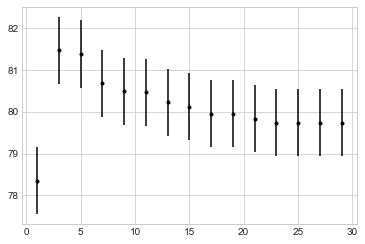

In [39]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)
b_error=[]
k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    f1=f1_score(y_cv,pred, average='weighted') * float(100)
    b_error.append(f1)

dy=0.8
b_error=np.array(b_error)
k=np.array(k)
plt.errorbar(k,b_error ,yerr=dy, fmt='.k')    

    



****Test accuracy for k = 5 is 87%

 f1-score for k=5 is 86%
[[4286  118]
 [ 938 3288]]


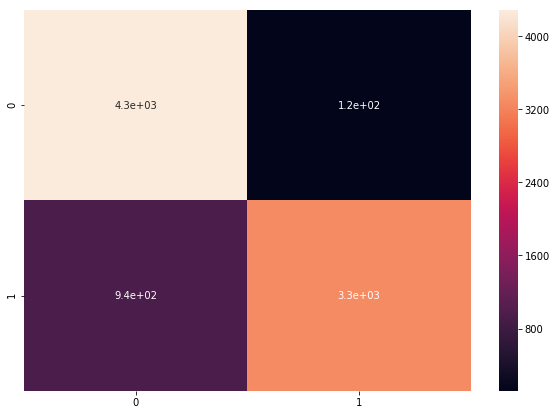

In [26]:
bw_X = sparse.load_npz('bow_test.npz')
bw_y= test['Score']
bwX_resampled, bwy_resampled=ros.fit_sample(X,y)
X_train_bw,X_test_bw,y_train_bw,y_test_bw = train_test_split(bwX_resampled, bwy_resampled, random_state=0)
knn = KNeighborsClassifier(3)
knn.fit(X_train_bw,y_train_bw)
pred = knn.predict(X_test_bw)
acc = accuracy_score(y_test_bw, pred, normalize=True) * float(100)
f1=f1_score(y_test_bw,pred) * float(100)
print('\n****Test accuracy for k = 5 is %d%%' % (acc))
print('\n f1-score for k=5 is %d%%' %(f1))
cm_bw= metrics.confusion_matrix(y_test_bw,pred)
print(cm_bw)
df_bw = pd.DataFrame(cm_bw, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_bw, annot=True)

<ErrorbarContainer object of 3 artists>

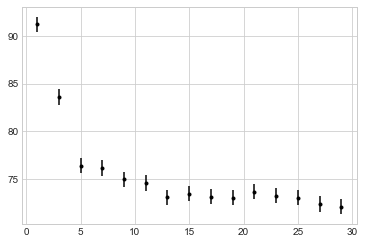

In [37]:
#TF-IDF

X_tf_idf=sparse.load_npz('tf_cv2.npz')
y_tf_idf=cv['Score']
tfX_resampled, tfy_resampled=ros.fit_sample(X,y)
X_tf, X_test_tf, y_tf, y_test_tf = cross_validation.train_test_split(tfX_resampled, tfy_resampled, test_size=0.3, random_state=0)
# split the train data set into cross validation train and cross validation test
X_tr_tf, X_cv_tf, y_tr_tf, y_cv_tf = cross_validation.train_test_split(X_tf, y_tf, test_size=0.3)
tf_error=[]
k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_tf, y_tr_tf)

    # predict the response on the crossvalidation train
    pred_id = knn.predict(X_cv_tf)

    # evaluate CV accuracy
    f1=f1_score(y_cv_tf,pred_id, average='weighted') * float(100)
    tf_error.append(f1)
dy=0.8
tf_error=np.array(tf_error)
k=np.array(k)
plt.errorbar(k,bw_error ,yerr=dy, fmt='.k')    



****Test accuracy for k = 1 is 72%

 f1-score for k=2 is 72%
[[4328   23]
 [ 463 3847]]


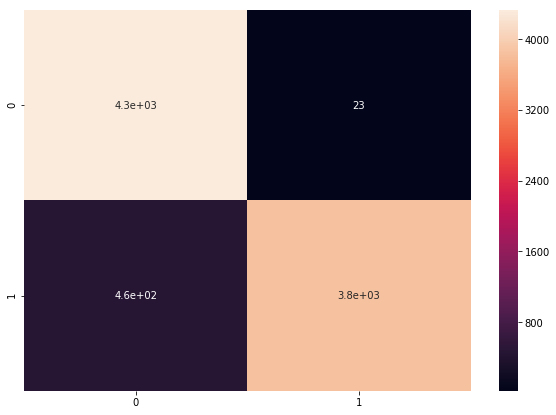

In [25]:
test_idf_vector=sparse.load_npz('tf_test.npz')
test_idf_label=test['Score']
tfX_resampled1, tfy_resampled2=ros.fit_sample(test_idf_vector,test_idf_label)
X_train_idf_vector, X_test_idf_vector,y_train_idf_label,y_test_idf_label= train_test_split(tfX_resampled1, tfy_resampled2,random_state=0)
knn = KNeighborsClassifier(1)
knn.fit(X_train_idf_vector,y_train_idf_label)
pred_idf = knn.predict(X_test_idf_vector)
acc_idf = accuracy_score(y_test_idf_label, pred_idf, normalize=True) * float(100)
f1_idf=f1_score(y_test_idf_label,pred_idf) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))
print('\n f1-score for k=1 is %d%%' %(f1))
cm_idf= metrics.confusion_matrix(y_test_idf_label,pred_idf)
print(cm_idf)
df_idf = pd.DataFrame(cm_idf, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_idf, annot=True)

<ErrorbarContainer object of 3 artists>

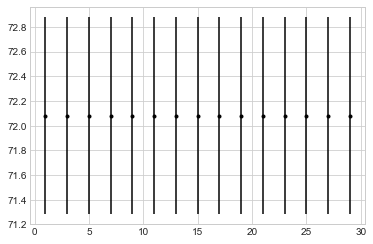

In [36]:
#w2v model
X_w2=pd.read_csv('w2v_cv.csv')
y_w2=pd.DataFrame(cv['Score'])
y_w2= y_w2.iloc[: -1]
w2X_resampled1, w2y_resampled2=ros.fit_sample(X_w2,y_w2)

X_train_w2, X_test_w2, y_train_w2, y_test_w2 = cross_validation.train_test_split(w2X_resampled1, w2y_resampled2, test_size=0.3, random_state=0)
# split the train data set into cross validation train and cross validation test
X_tr_w2, X_cv_w2, y_tr_w2, y_cv_w2 = cross_validation.train_test_split(X_train_w2, y_train_w2, test_size=0.3)
tf_f1=[]
k_tf=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_w2, y_tr_w2)

    # predict the response on the crossvalidation train
    pred_w2 = knn.predict(X_cv_w2)

    # evaluate CV accuracy
    acc_w2 = accuracy_score(y_cv_w2, pred_w2, normalize=True) * float(100)
    f1_w2=f1_score(y_cv_w2,pred_w2, average='weighted') * float(100)
    tf_f1.append(f1)
dy=0.8
tf_f1=np.array(tf_f1)
k_tf=np.array(k_tf)
plt.errorbar(k_tf,tf_f1 ,yerr=dy, fmt='.k')  
    




****Test accuracy for k = 1 is 90%

 f1-score for k=1 is 89%
[[4328   23]
 [ 770 3540]]


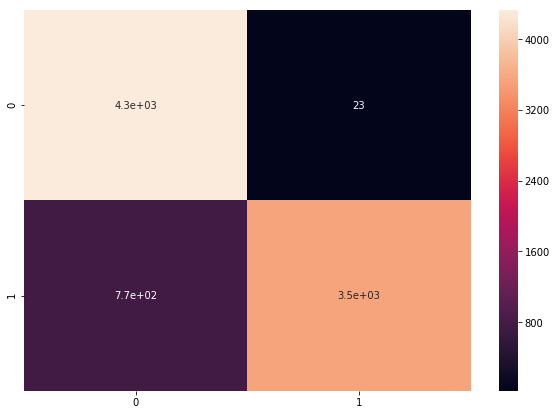

In [29]:
X_w=pd.read_csv('w2v_test.csv')
y_w=test['Score']
w2X_resampled3, w2y_resampled4=ros.fit_sample(X_w,y_w)
X_train_w, X_test_w,y_train_w,y_test_w= train_test_split(w2X_resampled3, w2y_resampled4,random_state=0)
knn = KNeighborsClassifier(1)
knn.fit(X_train_w,y_train_w)
pred_w= knn.predict(X_test_w)
acc_w = accuracy_score(y_test_w, pred_w, normalize=True) * float(100)
f1_w=f1_score(y_test_w,pred_w) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc_w))
print('\n f1-score for k=1 is %d%%' %(f1_w))
cm_w= metrics.confusion_matrix(y_test_w,pred_w)
print(cm_w)
df_w = pd.DataFrame(cm_w, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_w, annot=True)

In [11]:
#kd-tree for train -data
bow_kd=pd.read_csv('train.csv')
bow_kd=bow_kd.iloc[0:20000, :]
c_vect= CountVectorizer(max_features=100, min_df=10)
kdb_sp=c_vect.fit_transform(bow_kd['cleaned_text'].values)
X=kdb_sp.todense()


In [12]:
kdt = KDTree(X, leaf_size=2, metric='euclidean')
print(kdt.query(X, k=2, return_distance=False) )

[[    0  4767]
 [    1  4479]
 [16689     2]
 ...
 [19997  2198]
 [19998  1453]
 [19999  8314]]


In [30]:
conclusion = pd.DataFrame({"f1-score":[86,72,89,"NA"], "hyper-parameter":[5,1,1,"NA"], "model":["brute","brute","brute","kd-tree"], "vectorizer":["bow","tf-idf","avg-w2v","train-data"]})
itable.PrettyTable(conclusion)

f1-score,hyper-parameter,model,vectorizer
86,5,brute,bow
72,1,brute,tf-idf
89,1,brute,avg-w2v
NA,NA,kd-tree,train-data
